In [1]:
# imports pandas and matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# imports csv 
firearm = pd.read_csv("firearm-seizures-data.csv")

In [3]:
# drops any data that does not have a neighborhood attatched to it
firearm.dropna(subset = ["neighborhood"], inplace=True)
#firearm.head(5)

In [4]:
# converts total_count to integers
firearm['total_count'] = pd.to_numeric(firearm['total_count'])

In [5]:
# sums up the total_count by neighborhood
firearm_sum = firearm.groupby('neighborhood')['total_count'].sum()

In [6]:
# converts the groupby to a dataframe
fire_final = pd.DataFrame(firearm_sum)

In [7]:
# sets it so it will display all the rows
pd.set_option('display.max_rows', None)

In [8]:
# sorts it in ascending order
fire_final = fire_final.sort_values(['total_count', 'neighborhood'], ascending=[1, 0])

In [9]:
print(fire_final)

                           total_count
neighborhood                          
Lincoln Place                        1
Oakwood                              2
West End                             3
Summer Hill                          3
Regent Square                        3
Mt. Oliver                           3
Esplen                               4
Chartiers City                       4
Hays                                 5
Friendship                           5
St. Clair                            7
Fairywood                            7
Banksville                           7
Westwood                             8
Polish Hill                          8
Mount Oliver Borough                 8
Windgap                              9
Stanton Heights                      9
South Shore                          9
Squirrel Hill North                 10
Spring Garden                       10
Arlington Heights                   10
North Oakland                       11
Bon Air                  

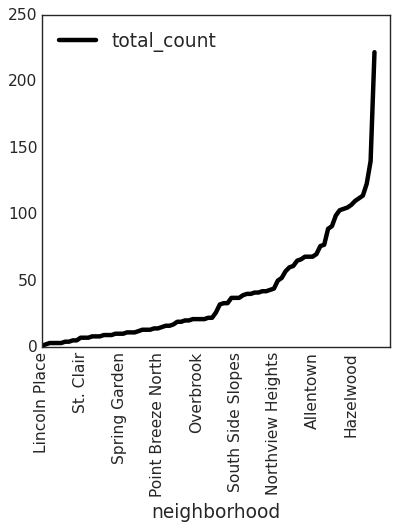

In [76]:
fire_final.plot(rot=90, figsize=(5,5))

In [81]:
# drops all the columns that we do not need
firearm = firearm.drop(columns=['tract','police_zone','fire_zone','latitude','longitude','ward',
                            'council_district','address','public_works_division'])
# better visual rep
firearm.head(5)

,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood
1,1,0,1,0,0,0,2017,4,6,Bluff
2,1,0,1,0,0,0,2015,8,1,Bluff
3,1,0,0,1,0,0,2015,11,5,Homewood West
4,1,0,1,0,0,0,2016,9,0,Manchester
5,1,0,1,0,0,0,2016,9,6,Brookline


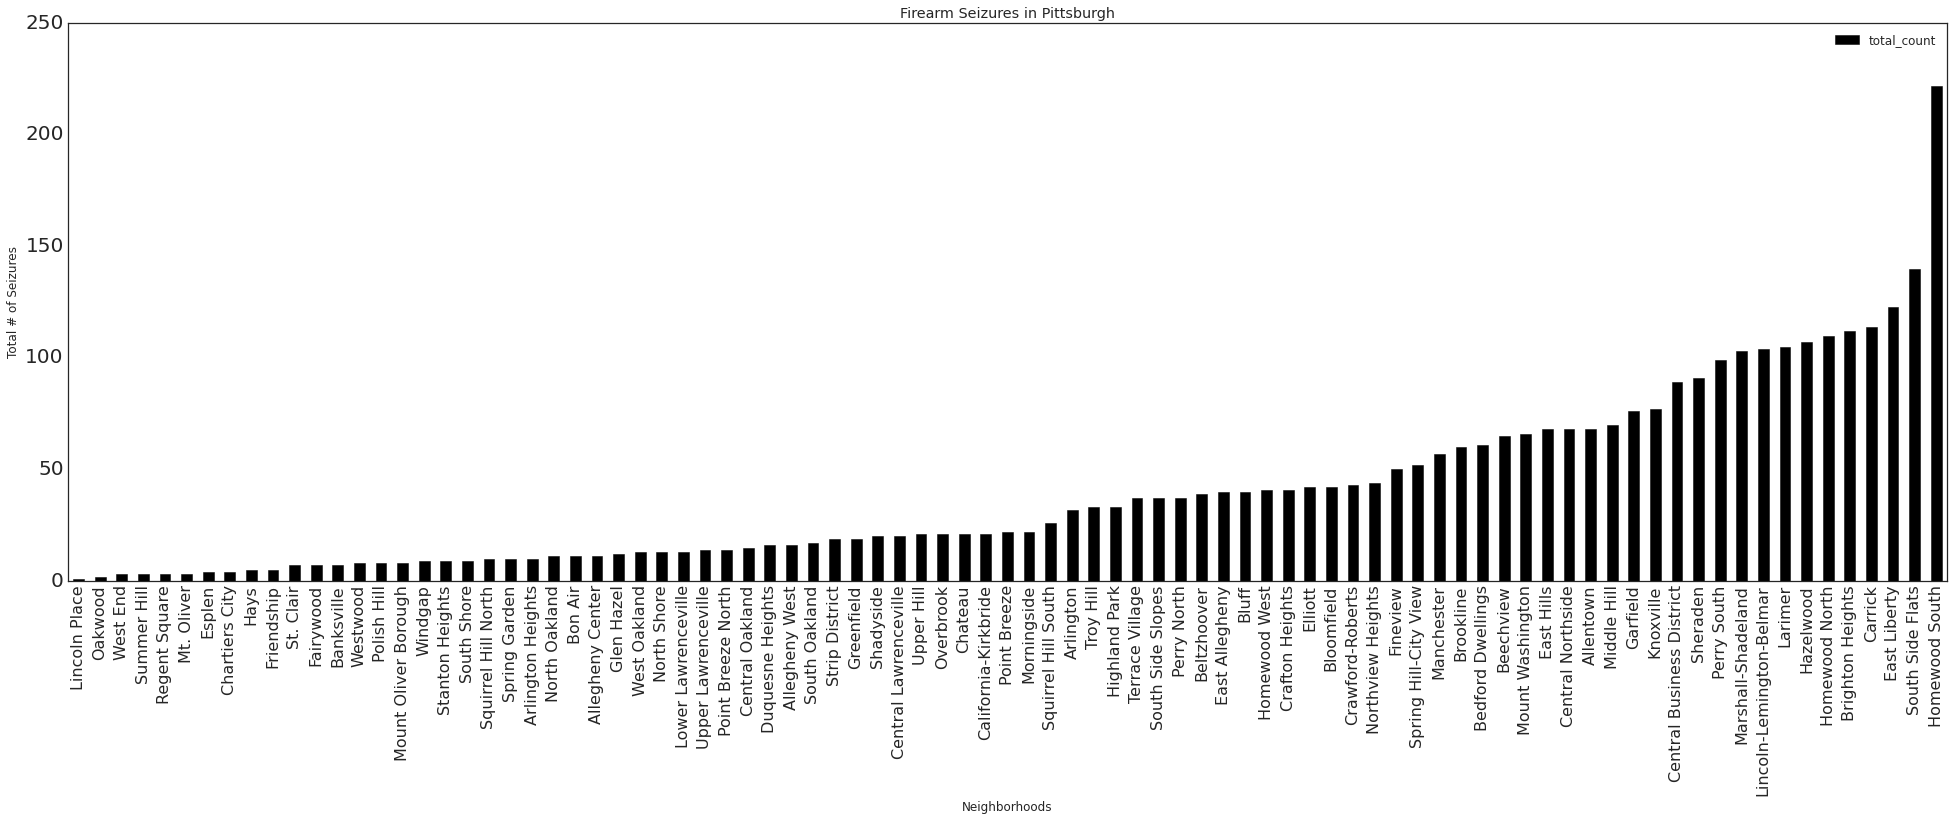

In [82]:
fire_final.plot(kind='bar', stacked=True, figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.title("Firearm Seizures in Pittsburgh")
plt.xlabel("Neighborhoods")
plt.ylabel("Total # of Seizures")
plt.style.use('seaborn-white')